# Exploratory Data Analysis 

We have datasets corresponding to variation in the following parameters of the ligament ensemble
- Two levels of initial perturbation strength : $\varepsilon = \{0.038, 0.076\}$
- Two levels of aspect-ratio, defined with respect to initial ligament width : $\Lambda = \{50,100\}$

We start by loading the required libraries, and set the plotting styles. 

In [1]:
# Required libraries for data arrays, data manipulation, plotting etc
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}",r'\boldmath']


#sns.set(style="white", palette="muted")
#sns.set_context("paper")


This is an example of the images generated from the simulation of an individual ligament.

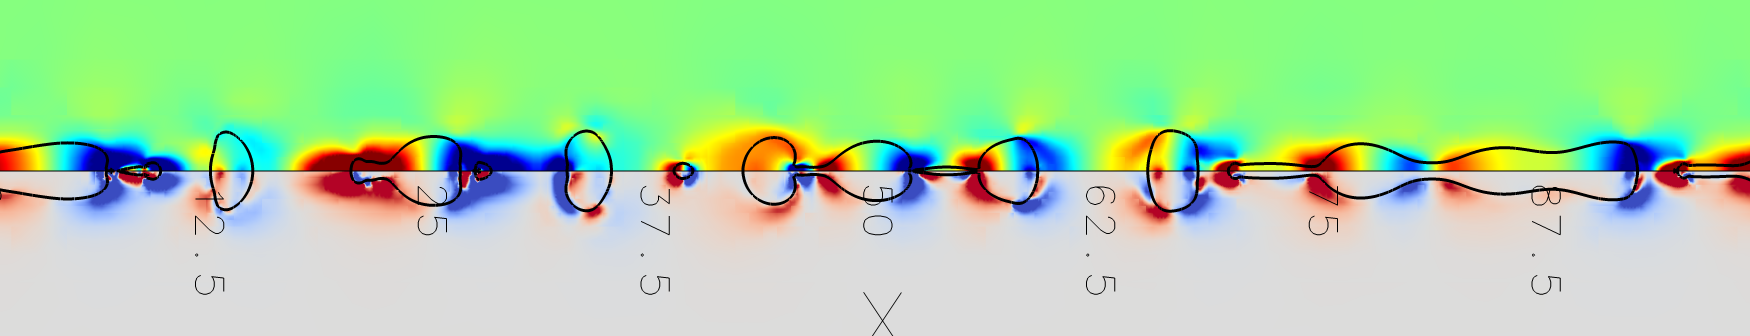

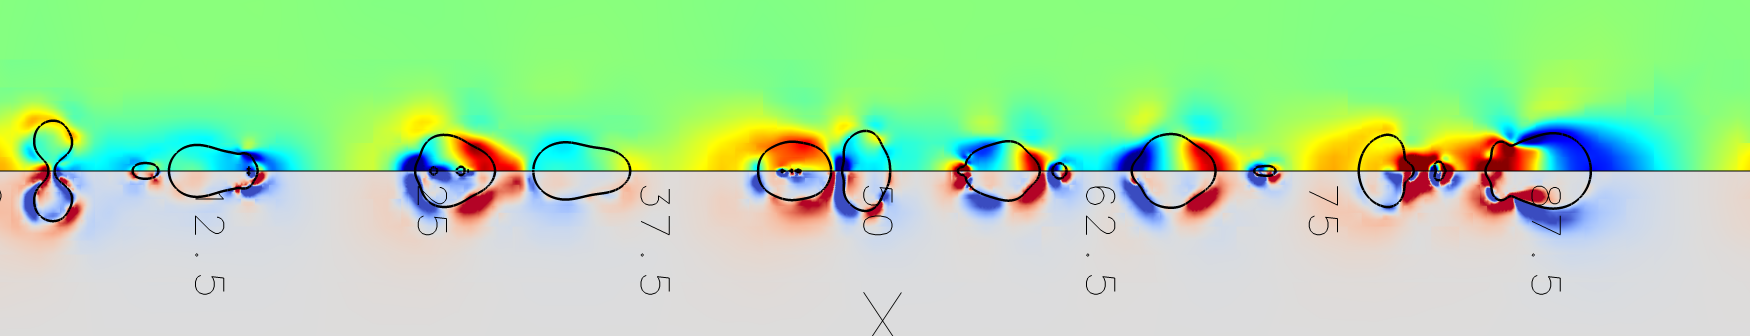

In [17]:
from IPython.display import Image, display

listOfImageNames = ['../d1/img-snapshot-12.png',
                    '../d3/img-snapshot-12.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

Both images are saved at $T=12$, where the top image corresponds to the weaker initial perturbation. Now we load the big dataset. 

In [16]:
drops = pd.read_csv("../results", sep=" ")
drops.head()

,Ohnesorge,aspect-ratio,cut-off,amplitude,time,tag,position,velocity,area,diameter,mass,separation,cells
0,0.01,50,0.5,0.1,0,1,49.4770,0.000000,100.8100,11.33220,761.60000,100.0000,7797
1,0.01,50,0.5,0.1,6,1,49.4352,-0.000002,103.4560,11.48000,791.78400,100.0000,828
2,0.01,50,0.5,0.1,12,1,49.2898,0.000295,101.9160,11.39430,774.17600,100.0000,2487
3,0.01,50,0.5,0.1,18,13,93.7334,-0.081582,10.3715,3.63485,25.13270,27.0941,190
4,0.01,50,0.5,0.1,18,12,84.5200,-0.878589,1.8992,1.55543,1.96938,9.2134,181


The **area** column is not actually area, but for the 3D axisymmetric solver, the `dv` volume element corresponds to volume per unit radian. Thus, all integral quantities (e.g. drop volume) need to be multiplied by a factor of $2\pi L$, where $L$ is the domain size. 